In [1]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest

In [2]:
promoter_file = open("promoters.bed")

e4_cpg_file = open("output/CpG_context_SRR3083926_1.chr6_bismark_bt2_pe.deduplicated.txt")
e55_cpg_file = open("output/CpG_context_SRR3083929_1.chr6_bismark_bt2_pe.deduplicated.txt")

e4_chg_file = open("output/CHG_context_SRR3083926_1.chr6_bismark_bt2_pe.deduplicated.txt")
e55_chg_file = open("output/CHG_context_SRR3083929_1.chr6_bismark_bt2_pe.deduplicated.txt")

e4_chh_file = open("output/CHH_context_SRR3083926_1.chr6_bismark_bt2_pe.deduplicated.txt")
e55_chh_file = open("output/CHH_context_SRR3083929_1.chr6_bismark_bt2_pe.deduplicated.txt")

In [3]:
e4_files = [e4_cpg_file, e4_chg_file, e4_chh_file]
e55_files = [e55_cpg_file, e55_chg_file, e55_chh_file]

In [4]:
#obtain gene name and start/end positions from promoters.bed

promoters_e4 = []
promoters_e55 = []

for line in promoter_file:
    
    fields = line.split("\t")
    start = int(fields[1])
    end = int(fields[2])
    gene_name = fields[3]

    promoters_e4.append([gene_name, start, end, 0, 0])
    promoters_e55.append([gene_name, start, end, 0, 0])

In [5]:
#obtain count methylated and unmethylated for sites in each promoter
#this takes a long time to run

for file in e4_files:
    
    for line in file:
        if line.startswith("Bismark"):
            continue 
            
        fields = line.split("\t")
        meth_state = fields[1]
        pos = int(fields[3])
        
        for promoter in promoters_e4:
            start = promoter[1]
            end = promoter[2]
            
            if start <= pos <= end:
                if meth_state == "+":
                    promoter[3] += 1
                else:
                    promoter[4] += 1
promoters_e4

[['Mpp6', 50108240, 50110240, 1, 155],
 ['Dfna5', 50261769, 50263769, 3, 182],
 ['Osbpl3', 50382837, 50384837, 1, 320],
 ['Cycs', 50566474, 50568474, 3, 222],
 ['Mir6371', 50570397, 50572397, 11, 461],
 ['Npvf', 50654393, 50656393, 4, 186],
 ['Mir148a', 51269910, 51271910, 0, 131],
 ['Gm6559', 51377709, 51379709, 3, 377],
 ['Nfe2l3', 51430669, 51432669, 1, 290],
 ['Cbx3', 51468615, 51470615, 1, 322],
 ['Hnrnpa2b1', 51469894, 51471894, 5, 250],
 ['Snx10', 51521902, 51523902, 6, 435],
 ['Skap2', 52012549, 52014549, 5, 327],
 ['Halr1', 52100948, 52102948, 3, 424],
 ['Hotairm1', 52156523, 52158523, 1, 149],
 ['Hoxa1', 52158317, 52160317, 3, 166],
 ['Hoxaas2', 52163673, 52165673, 25, 289],
 ['Hoxa2', 52164831, 52166831, 27, 313],
 ['Hoxa4', 52191703, 52193703, 0, 314],
 ['Hoxaas3', 52199123, 52201123, 8, 360],
 ['Hoxa5', 52204587, 52206587, 2, 175],
 ['Hoxa6', 52208624, 52210624, 3, 470],
 ['Hoxa3', 52213067, 52215067, 23, 232],
 ['Mira', 52215288, 52217288, 2, 228],
 ['Hoxa7', 52218573, 52

In [6]:
for file in e55_files:
    
    for line in file:
        if line.startswith("Bismark"):
            continue 
            
        fields = line.split("\t")
        meth_state = fields[1]
        pos = int(fields[3])
        
        for promoter in promoters_e55:
            start = promoter[1]
            end = promoter[2]
            
            if start <= pos <= end:
                if meth_state == "+":
                    promoter[3] += 1
                else:
                    promoter[4] += 1
promoters_e55

[['Mpp6', 50108240, 50110240, 1, 119],
 ['Dfna5', 50261769, 50263769, 16, 383],
 ['Osbpl3', 50382837, 50384837, 26, 436],
 ['Cycs', 50566474, 50568474, 28, 315],
 ['Mir6371', 50570397, 50572397, 28, 637],
 ['Npvf', 50654393, 50656393, 36, 660],
 ['Mir148a', 51269910, 51271910, 6, 203],
 ['Gm6559', 51377709, 51379709, 26, 490],
 ['Nfe2l3', 51430669, 51432669, 19, 618],
 ['Cbx3', 51468615, 51470615, 0, 629],
 ['Hnrnpa2b1', 51469894, 51471894, 0, 241],
 ['Snx10', 51521902, 51523902, 12, 505],
 ['Skap2', 52012549, 52014549, 6, 406],
 ['Halr1', 52100948, 52102948, 58, 722],
 ['Hotairm1', 52156523, 52158523, 2, 207],
 ['Hoxa1', 52158317, 52160317, 0, 45],
 ['Hoxaas2', 52163673, 52165673, 0, 315],
 ['Hoxa2', 52164831, 52166831, 1, 159],
 ['Hoxa4', 52191703, 52193703, 15, 565],
 ['Hoxaas3', 52199123, 52201123, 9, 544],
 ['Hoxa5', 52204587, 52206587, 6, 458],
 ['Hoxa6', 52208624, 52210624, 5, 178],
 ['Hoxa3', 52213067, 52215067, 8, 390],
 ['Mira', 52215288, 52217288, 10, 354],
 ['Hoxa7', 522185

In [7]:
#obtain lists of % sites methylated for each promoter
#make separate list for hox genes

e4_hist = []
e55_hist = []

e4_hox = []
e55_hox = []

for promoter in promoters_e4:
    gene_name = promoter[0]
    
    meth = promoter[3]
    unmeth = promoter[4]
    meth_score = meth/(meth+unmeth)*100
    
    if "Hox" in gene_name:
        e4_hox.append(meth_score)
    else:
        e4_hist.append(meth_score)
        
for promoter in promoters_e55:
    gene_name = promoter[0]
    
    meth = promoter[3]
    unmeth = promoter[4]
    meth_score = meth/(meth+unmeth)*100
    
    if "Hox" in gene_name:
        e55_hox.append(meth_score)
    else:
        e55_hist.append(meth_score)

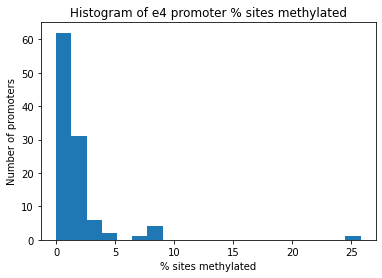

In [8]:
fig, ax = plt.subplots()
ax.hist(e4_hist+e4_hox, bins=20)

ax.set_title("Histogram of e4 promoter % sites methylated")
ax.set_xlabel("% sites methylated")
ax.set_ylabel("Number of promoters")
plt.show()

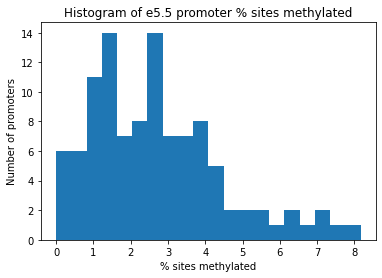

In [9]:
fig, ax = plt.subplots()
ax.hist(e55_hist+e55_hox, bins=20)

ax.set_title("Histogram of e5.5 promoter % sites methylated")
ax.set_xlabel("% sites methylated")
ax.set_ylabel("Number of promoters")
plt.show()

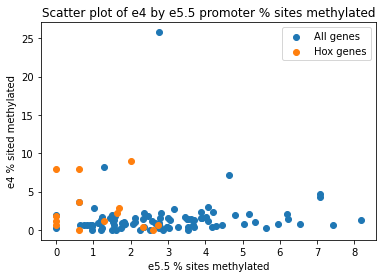

In [10]:
fig, ax = plt.subplots()
ax.scatter(e55_hist, e4_hist, label = "All genes")
ax.scatter(e55_hox, e4_hox, label = "Hox genes")

ax.set_title("Scatter plot of e4 by e5.5 promoter % sites methylated")
ax.set_xlabel("e5.5 % sites methylated")
ax.set_ylabel("e4 % sited methylated")

ax.legend()

plt.show()

In [11]:
ttest(e4_hox, e4_hist, alternative = "less")

Ttest_indResult(statistic=1.53569854750514, pvalue=0.9361898795134075)

In [12]:
ttest(e55_hox, e55_hist, alternative = "less")

Ttest_indResult(statistic=-3.6409658841358237, pvalue=0.00021176202652390744)

Hox gene promoters are not significantly less methylated than other gene promoters in E4

Hox gene promoters are significantly less methylated than other gene promoters in E5.5